In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [33]:
df = pd.read_parquet('semcor_train.parquet')

### 1. Basic Statistics

In [47]:
total_samples = len(df)
unique_target_words = df['target_word'].nunique()
unique_senses = df['label'].nunique()
unique_sentences = df['sentence'].nunique()

print(f"--- Basic Statistics ---")
print(f"Total Samples: {total_samples}")
print(f"Unique Target Words: {unique_target_words}")
print(f"Unique Senses (Labels): {unique_senses}")
print(f"Unique Sentences: {unique_sentences}")

--- Basic Statistics ---
Total Samples: 224515
Unique Target Words: 33574
Unique Senses (Labels): 25805
Unique Sentences: 36209


### Part of Speech (POS) Distribution

In [48]:
def extract_pos(label):
    try:
        parts = str(label).split('.')
        
        if len(parts) < 2:
            return 'Unknown'

        tag = parts[-2] 
        
        mapping = {
            'n': 'Noun',
            'v': 'Verb',
            'a': 'Adjective',
            's': 'Adjective', 
            'r': 'Adverb'
        }
        
        return mapping.get(tag, 'Unknown')
        
    except AttributeError:
        return 'Unknown'

In [49]:
df['pos'] = df['label'].apply(extract_pos)
pos_counts = df['pos'].value_counts()
pos_counts

pos
Verb         88024
Noun         86570
Adjective    30992
Adverb       18929
Name: count, dtype: int64

### Sense Distribution (Class Imbalance)

In [50]:
sense_counts = df['label'].value_counts()
top_20_senses = sense_counts.head(20)
top_20_senses

label
be.v.01          10073
person.n.01       6764
be.v.02           2941
state.v.01        1944
not.r.01          1703
group.n.01        1328
have.v.01         1185
location.n.01      988
make.v.01          947
be.v.03            799
exist.v.01         788
look.v.02          735
use.v.01           696
be.v.05            665
two.s.01           570
know.v.01          544
besides.r.02       532
merely.r.01        514
one.s.01           507
see.v.01           481
Name: count, dtype: int64

### Polysemy Analysis (Senses per Word)

In [51]:
# Group by target word and count unique labels for each
word_polysemy = df.groupby('target_word')['label'].nunique()
avg_polysemy = word_polysemy.mean()
print(f"\nAverage Senses per Target Word in Dataset: {avg_polysemy:.2f}")


Average Senses per Target Word in Dataset: 1.54


### Sentence Length Distribution (in words)

In [52]:
df['sentence_len'] = df['sentence'].apply(lambda x: len(str(x).split()))

### Visualization

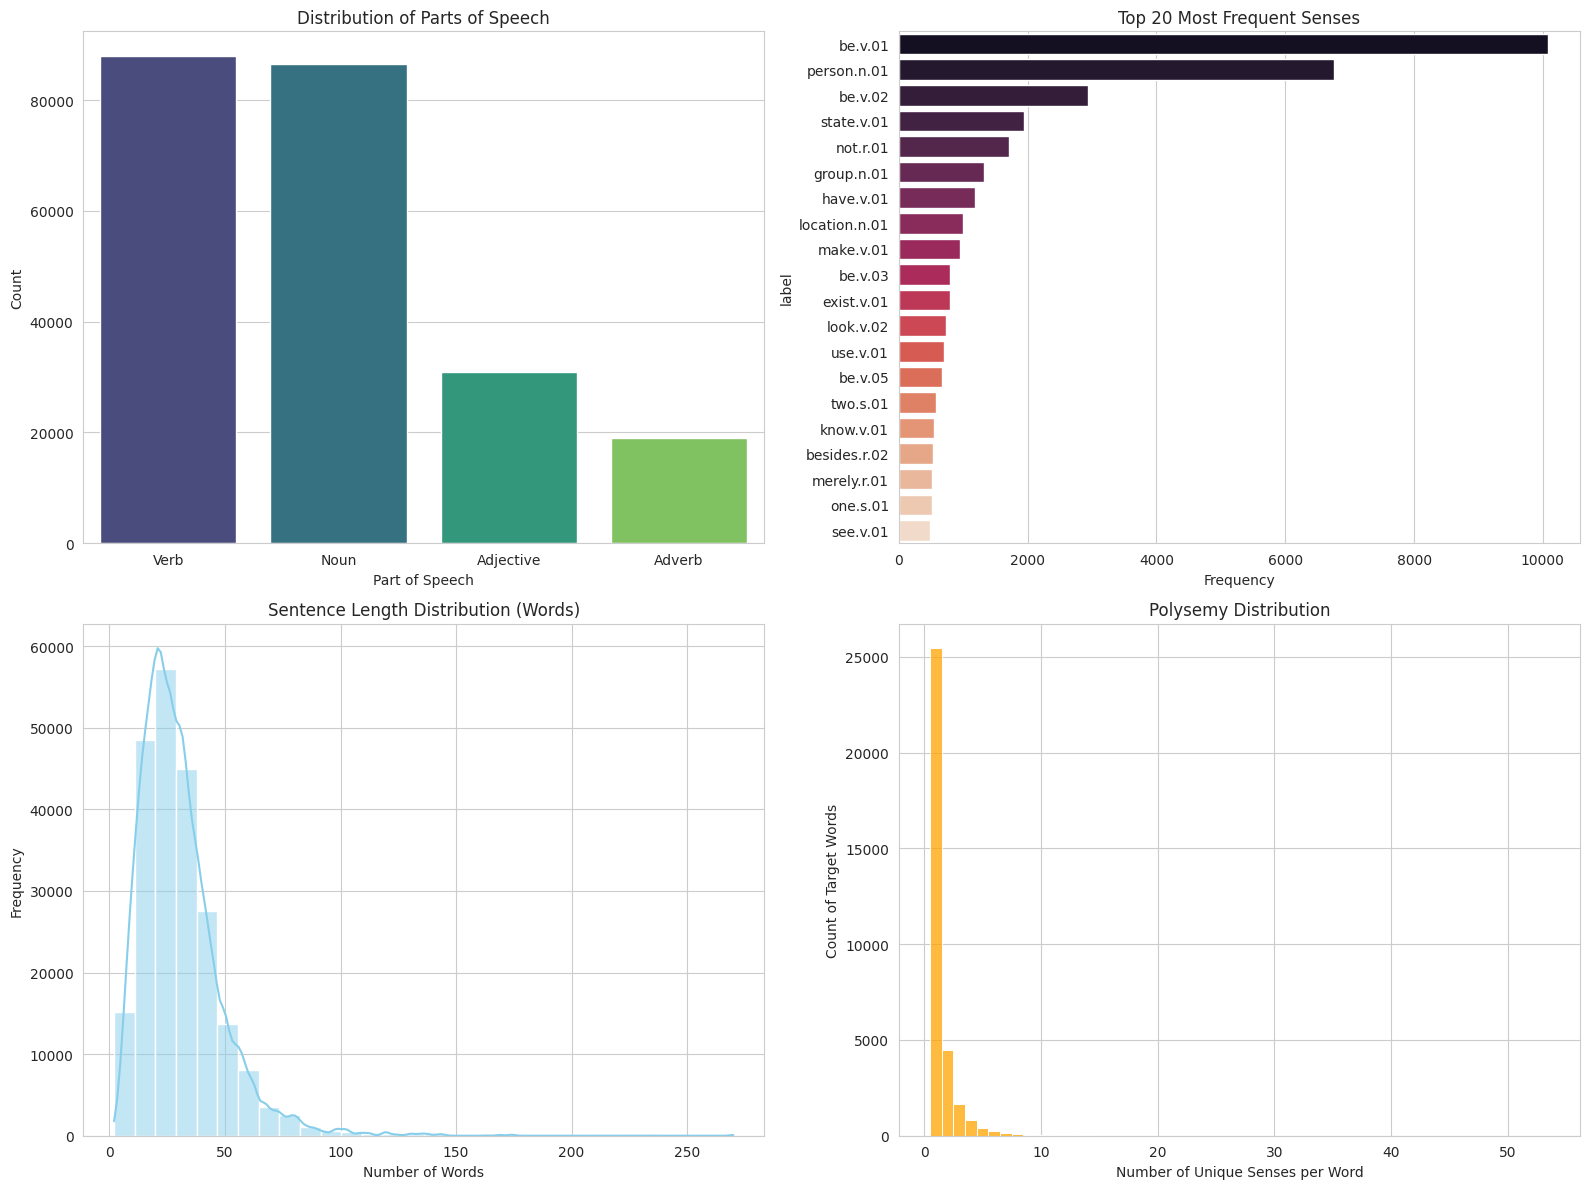

In [54]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 12))

# Plot 1: POS Distribution
plt.subplot(2, 2, 1)
sns.barplot(x=pos_counts.index, y=pos_counts.values, hue=pos_counts.index, palette="viridis", legend=False)
plt.title("Distribution of Parts of Speech")
plt.xlabel("Part of Speech")
plt.ylabel("Count")

# Plot 2: Top 20 Most Frequent Senses
plt.subplot(2, 2, 2)
sns.barplot(x=top_20_senses.values, y=top_20_senses.index, hue=top_20_senses.index, palette="rocket", legend=False)
plt.title("Top 20 Most Frequent Senses")
plt.xlabel("Frequency")

# Plot 3: Sentence Length Distribution
plt.subplot(2, 2, 3)
sns.histplot(df['sentence_len'], bins=30, kde=True, color="skyblue")
plt.title("Sentence Length Distribution (Words)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")

# Plot 4: Polysemy Distribution
plt.subplot(2, 2, 4)
sns.histplot(word_polysemy, discrete=True, color="orange")
plt.title("Polysemy Distribution")
plt.xlabel("Number of Unique Senses per Word")
plt.ylabel("Count of Target Words")

plt.tight_layout()
plt.show()

> - The analysis shows a dataset of 224,515 samples covering roughly 33,000 unique words and 25805 unique Senses.  
> - Nouns and verbs dominate in the dataset, making up the vast majority of the data, while adjectives and adverbs are much less frequent.  
> - A significant issue is the severe class imbalance: a few top senses like 'be.v.01' and 'person.n.01' appear thousands of times, whereas the long tail of senses has very few examples.  
> - The relatively low average polysemy of 1.54 indicates that a significant portion of words in this dataset appear with only a single meaning. This suggests that for many words, the model may simply memorize the label without learning to analyze the context.
> - Furthermore, the sharp drop-off in the counts of top labels shows that even when words do have multiple meanings, one sense usually dominates heavily. Consequently, the model is likely to bias toward these frequent senses and may fail to recognize rarer definitions in real-world scenarios.  